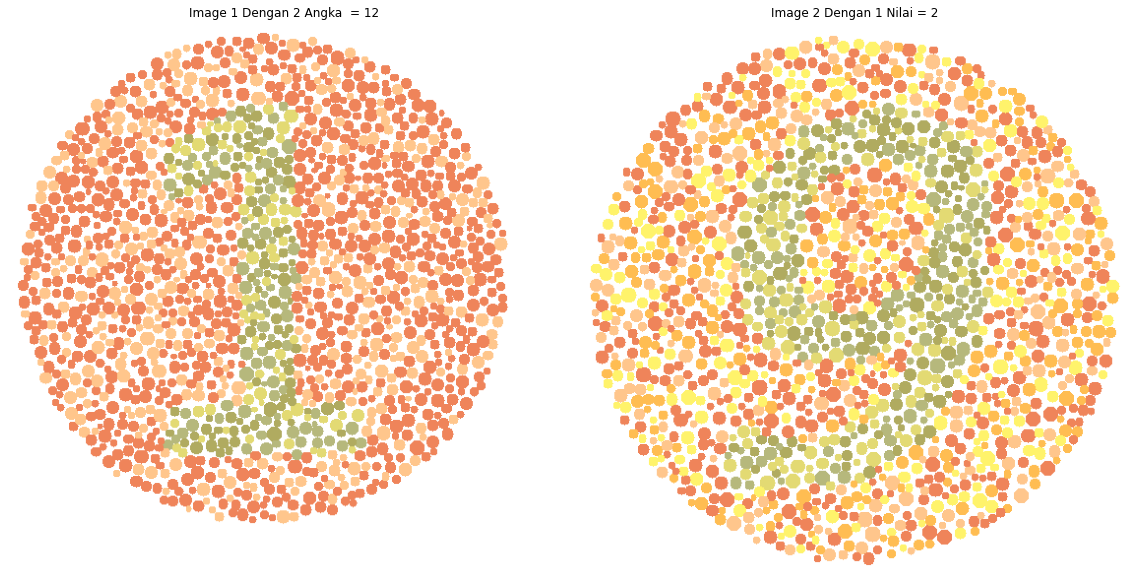

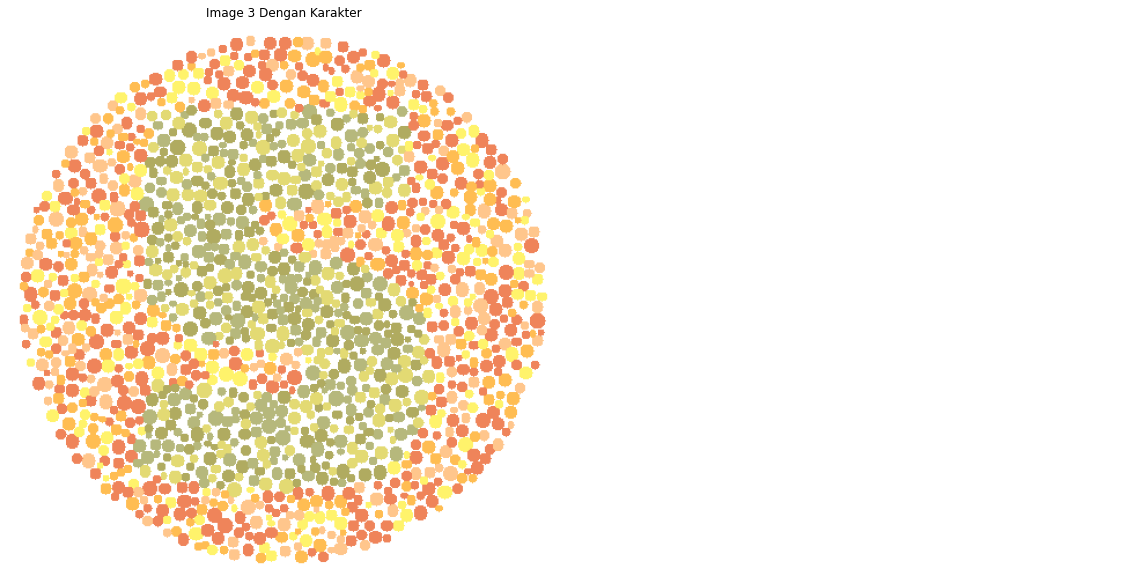

In [10]:
#Insert Input that will used
from scipy import ndimage as ndi # impot the necessary package fo watershed
from skimage.morphology import watershed, disk
from skimage import data,io
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import filters #Operator sobel
from skimage.util import compare_images
import numpy as np

"""#1. Input Image"""

#Input image that will be implement a segmentation
img1 = io.imread("/content/1_Varela-Regulartheme_2 type_2.png") #open read image 
img2 = io.imread("/content/9_Waree-Obliquetheme_4 type_3.png") #open read image 
img3 = io.imread("/content/5_Changa-Boldtheme_4 type_3.png") #open read image 

#Menampilkan Output
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16,8))

axes[0].imshow(img1, cmap=plt.cm.gray)
axes[0].set_title('Image 1 Dengan 2 Angka  = 12')

axes[1].imshow(img2, cmap=plt.cm.gray)
axes[1].set_title('Image 2 Dengan 1 Nilai = 2')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

#Menampilkan Output
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16,8))

axes[0].imshow(img3, cmap=plt.cm.gray)
axes[0].set_title('Image 3 Dengan Karakter')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-11-47eba84097f6>:6: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  tinting1 = color.gray2rgb(img1)
<ipython-input-11-47eba84097f6>:7: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  tinting2 = color.gray2rgb(img2)
<ipython-input-11-47eba84097f6>:8: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning 

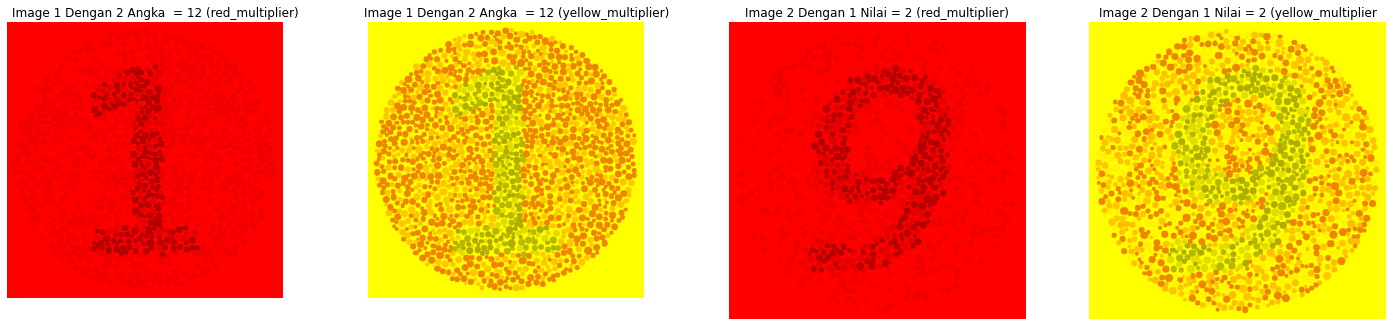

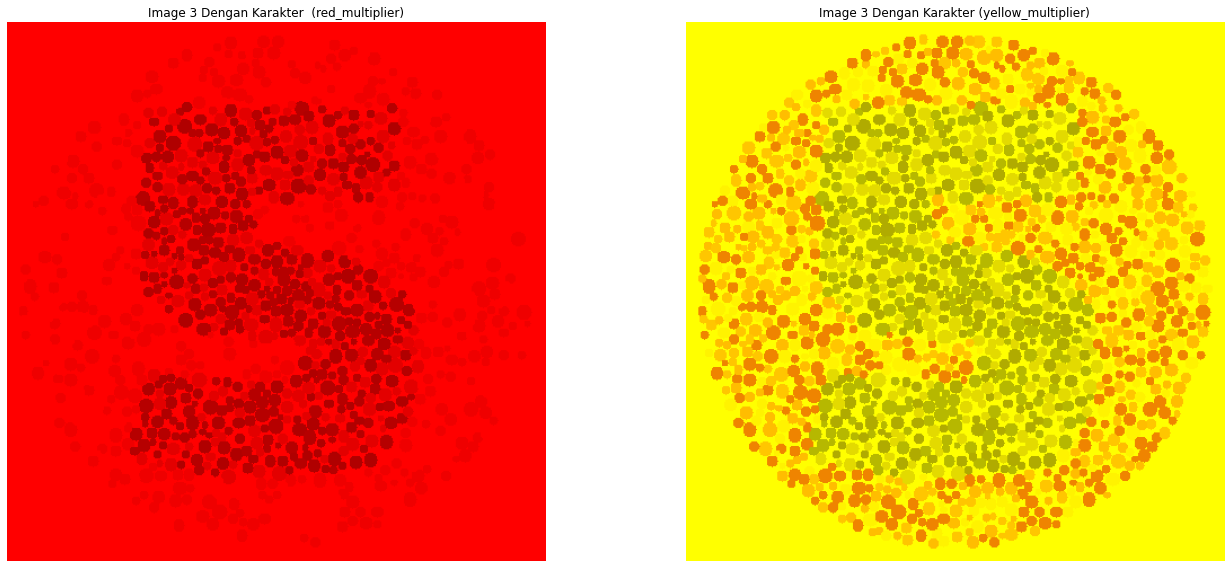

In [11]:
from skimage import data
from skimage import color
from skimage import img_as_float


tinting1 = color.gray2rgb(img1)
tinting2 = color.gray2rgb(img2)
tinting3 = color.gray2rgb(img3)

#Membagi ke daerah bewarna merah dan kuning
red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]
#Implemnetasi Tinting Grayscale dengan mengkalikan original image dengan nilai tinting 
#Pada setiap warna
graytinting1 = red_multiplier * tinting1 #Citra 1 Merah
graytinting11 = yellow_multiplier * tinting1 #Citra 1 Kuning
graytinting2 = red_multiplier * tinting2 #Citra 2 Merah
graytinting22 = yellow_multiplier * tinting2 #Citra 2 Kuning
graytinting3 = red_multiplier * tinting3#Citra 3 Merah
graytinting33 = yellow_multiplier * tinting3 #Citra 3 Kuning

#Menampilkan Output
fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True,
                         figsize=(20,8))

axes[0].imshow(graytinting1, cmap=plt.cm.gray)
axes[0].set_title('Image 1 Dengan 2 Angka  = 12 (red_multiplier)')

axes[1].imshow(graytinting11, cmap=plt.cm.gray)
axes[1].set_title('Image 1 Dengan 2 Angka  = 12 (yellow_multiplier)')


axes[2].imshow(graytinting2, cmap=plt.cm.gray)
axes[2].set_title('Image 2 Dengan 1 Nilai = 2 (red_multiplier)')

axes[3].imshow(graytinting22, cmap=plt.cm.gray)
axes[3].set_title('Image 2 Dengan 1 Nilai = 2 (yellow_multiplier')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(20,8))

axes[0].imshow(graytinting3, cmap=plt.cm.gray)
axes[0].set_title('Image 3 Dengan Karakter  (red_multiplier)')

axes[1].imshow(graytinting33, cmap=plt.cm.gray)
axes[1].set_title('Image 3 Dengan Karakter (yellow_multiplier)')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

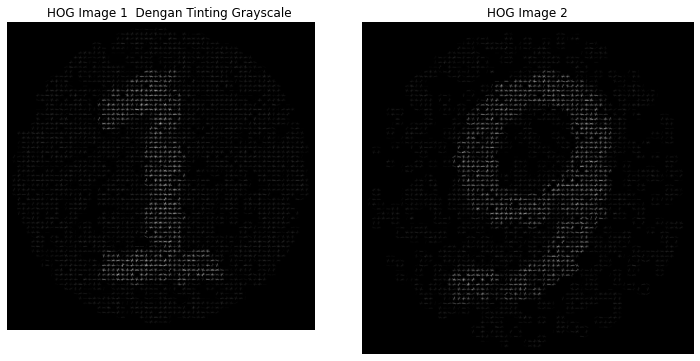

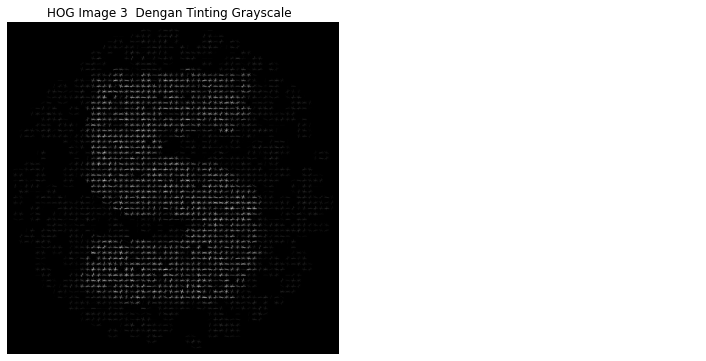

In [12]:

#Implemnentation HOG
from skimage.feature import hog #Lib menjalankan Histogram Orineted Gradient
from skimage import exposure #lib untuk merubah, mengetahui itensitas gambar
from skimage import exposure

#Implementation For Image 1 Original
fd1, hog_image1 = hog(graytinting1, orientations=9, pixels_per_cell=(8,8),block_norm='L2',
                    cells_per_block=(2,2), visualize=True,feature_vector=True,transform_sqrt=True)

#Gambar 2
fd, hog_image2 = hog(graytinting2, orientations=9, pixels_per_cell=(8,8),block_norm='L2',
                    cells_per_block=(2,2), visualize=True,feature_vector=True,transform_sqrt=True)

#Gambar 3
fd, hog_image3 = hog(graytinting3, orientations=9, pixels_per_cell=(8,8),block_norm='L2',
                    cells_per_block=(2,2), visualize=True,feature_vector=True,transform_sqrt=True)

# Logarithmic Menerangkan Cahayanya Gamma and log contrast adjustment
logarithmic_corrected1 = exposure.adjust_log(hog_image1, 2)
logarithmic_corrected2 = exposure.adjust_log(hog_image2, 2)
logarithmic_corrected3 = exposure.adjust_log(hog_image3, 1)

#Menampilakan Gamabr dari Yang setelah dilakukan HOG
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(10,5))

axes[0].imshow(logarithmic_corrected1, cmap=plt.cm.gray)
axes[0].set_title('HOG Image 1  Dengan Tinting Grayscale  ')

axes[1].imshow(logarithmic_corrected2, cmap=plt.cm.gray)
axes[1].set_title('HOG Image 2')


for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

#Menampilakan Gamabr dari Yang setelah dilakukan HOG
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(10,5))

axes[0].imshow(logarithmic_corrected3, cmap=plt.cm.gray)
axes[0].set_title('HOG Image 3  Dengan Tinting Grayscale  ')
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
